In [196]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/predictive-maintenance-dataset-ai4i-2020/ai4i2020.csv


In [197]:
import pandas as pd
import numpy as np
import matplotlib as plt
import matplotlib.pyplot as plt
import seaborn as sns

data = pd.read_csv('/kaggle/input/predictive-maintenance-dataset-ai4i-2020/ai4i2020.csv')
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   UDI                      10000 non-null  int64  
 1   Product ID               10000 non-null  object 
 2   Type                     10000 non-null  object 
 3   Air temperature [K]      10000 non-null  float64
 4   Process temperature [K]  10000 non-null  float64
 5   Rotational speed [rpm]   10000 non-null  int64  
 6   Torque [Nm]              10000 non-null  float64
 7   Tool wear [min]          10000 non-null  int64  
 8   Machine failure          10000 non-null  int64  
 9   TWF                      10000 non-null  int64  
 10  HDF                      10000 non-null  int64  
 11  PWF                      10000 non-null  int64  
 12  OSF                      10000 non-null  int64  
 13  RNF                      10000 non-null  int64  
dtypes: float64(3), int64(9)

# Performing Exploratory Data Analysis (EDA)

In [198]:
data.head(16)

,UDI,Product ID,Type,Air temperature [K],Process temperature [K],Rotational speed [rpm],Torque [Nm],Tool wear [min],Machine failure,TWF,HDF,PWF,OSF,RNF
0,1,M14860,M,298.1,308.6,1551,42.8,0,0,0,0,0,0,0
1,2,L47181,L,298.2,308.7,1408,46.3,3,0,0,0,0,0,0
2,3,L47182,L,298.1,308.5,1498,49.4,5,0,0,0,0,0,0
3,4,L47183,L,298.2,308.6,1433,39.5,7,0,0,0,0,0,0
4,5,L47184,L,298.2,308.7,1408,40.0,9,0,0,0,0,0,0
5,6,M14865,M,298.1,308.6,1425,41.9,11,0,0,0,0,0,0
6,7,L47186,L,298.1,308.6,1558,42.4,14,0,0,0,0,0,0
7,8,L47187,L,298.1,308.6,1527,40.2,16,0,0,0,0,0,0
8,9,M14868,M,298.3,308.7,1667,28.6,18,0,0,0,0,0,0
9,10,M14869,M,298.5,309.0,1741,28.0,21,0,0,0,0,0,0


In [199]:
data.drop(["UDI", "Product ID","RNF","OSF","PWF","HDF","TWF"], axis=1, inplace=True)
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 7 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Type                     10000 non-null  object 
 1   Air temperature [K]      10000 non-null  float64
 2   Process temperature [K]  10000 non-null  float64
 3   Rotational speed [rpm]   10000 non-null  int64  
 4   Torque [Nm]              10000 non-null  float64
 5   Tool wear [min]          10000 non-null  int64  
 6   Machine failure          10000 non-null  int64  
dtypes: float64(3), int64(3), object(1)
memory usage: 547.0+ KB


In [200]:
data.shape

(10000, 7)

In [201]:
data.drop_duplicates()
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 7 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Type                     10000 non-null  object 
 1   Air temperature [K]      10000 non-null  float64
 2   Process temperature [K]  10000 non-null  float64
 3   Rotational speed [rpm]   10000 non-null  int64  
 4   Torque [Nm]              10000 non-null  float64
 5   Tool wear [min]          10000 non-null  int64  
 6   Machine failure          10000 non-null  int64  
dtypes: float64(3), int64(3), object(1)
memory usage: 547.0+ KB


# Perform Label Encoding on features of the dataset

In [202]:
from sklearn.preprocessing import LabelEncoder
enc = LabelEncoder()
for i in data.columns:
    if data[i].dtype=="object":
        data[i]=enc.fit_transform(data[i])
data.columns=['Type','Air temperature','Process temperature','Rotational speed','Torque','Tool wear','Machine failure']
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 7 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Type                 10000 non-null  int64  
 1   Air temperature      10000 non-null  float64
 2   Process temperature  10000 non-null  float64
 3   Rotational speed     10000 non-null  int64  
 4   Torque               10000 non-null  float64
 5   Tool wear            10000 non-null  int64  
 6   Machine failure      10000 non-null  int64  
dtypes: float64(3), int64(4)
memory usage: 547.0 KB


# Visualizing the correlation of the dataset

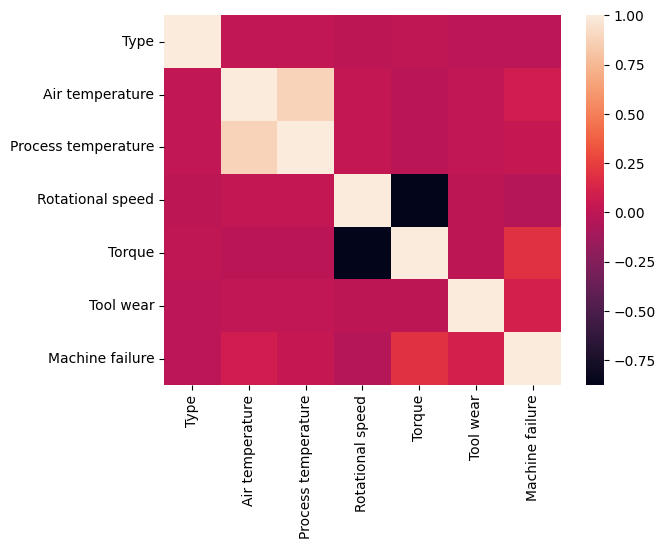

In [203]:
sns.heatmap(data.corr())

# Show the plot
plt.show()

In [204]:
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn import metrics
from sklearn.metrics import precision_recall_fscore_support
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import accuracy_score
from sklearn.metrics import f1_score

# Assigning dependent and independent values

In [205]:
y=data["Machine failure"]
x=data.drop(["Machine failure"],axis =1)

# Normalizing independent variables

In [206]:
from sklearn.preprocessing import StandardScaler, Normalizer
scaler=StandardScaler()
x=scaler.fit_transform(x)
x=Normalizer().fit_transform(x)

# Splitting the data (Testing and Training)

In [207]:
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size = 0.2, random_state=0)

# Naive Bayes Classifier

In [208]:
from sklearn.naive_bayes import GaussianNB
model = GaussianNB()
model.fit(x_train, y_train)
y_pred=model.predict(x_test)

# Evaluation of model

In [209]:
print("Accuracy score:%.3f"%accuracy_score(y_test, y_pred))
print('Precision: %.3f' % precision_score(y_test, y_pred, average = 'macro'))
print('Recall: %.3f' % recall_score(y_test, y_pred, average = 'macro'))
print('F1 score: %.3f'%f1_score(y_test,y_pred, average = 'macro'))

Accuracy score:0.963
Precision: 0.731
Recall: 0.506
F1 score: 0.503


<Axes: >

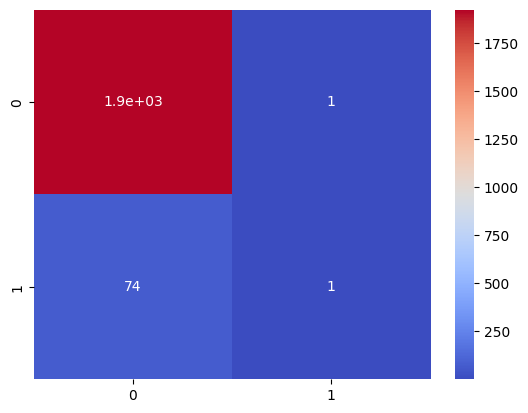

In [210]:
from sklearn.metrics import ConfusionMatrixDisplay
import matplotlib.pyplot as plt

y_true = y_test
mod = metrics.confusion_matrix(y_true,y_pred)
sns.heatmap(mod,annot=True,cmap='coolwarm')

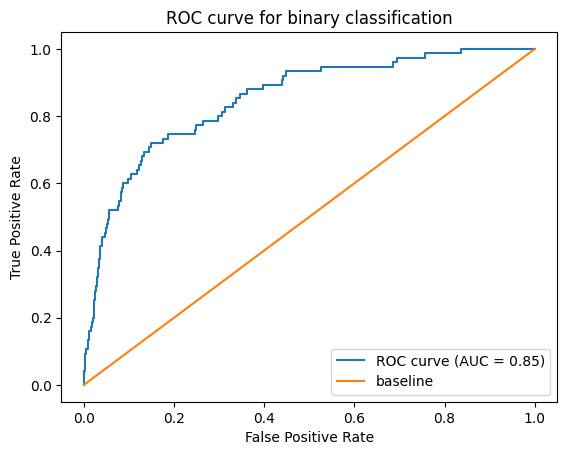

In [211]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, auc


# Predict the probabilities of the positive class
y_pred = model.predict_proba(x_test)[:,1]
y_pred.shape

# Calculate the ROC curve
fpr, tpr, thresholds = roc_curve(y_test, y_pred)

# Calculate the AUC score
auc_score = auc(fpr, tpr)
x1=np.linspace(0,1,100)
# Plot the ROC curve
plt.plot(fpr, tpr, label="ROC curve (AUC = %0.2f)" % auc_score)
plt.plot(x1,x1,label='baseline')
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC curve for binary classification")
plt.legend()
plt.show()

# Building Decision Tree Model

In [212]:
#Create the object
model = DecisionTreeClassifier()

#Train the model
model = model.fit(x_train, y_train)

#Predict the model
y_pred = model.predict(x_test)

# Evaluate the model (Obtain Accuracy)

In [213]:
print("Accuracy score:%.3f"%accuracy_score(y_test, y_pred))
print('Precision: %.3f' % precision_score(y_test, y_pred, average = 'macro'))
print('Recall: %.3f' % recall_score(y_test, y_pred, average = 'macro'))
print('F1 score: %.3f'%f1_score(y_test,y_pred, average = 'macro'))

Accuracy score:0.961
Precision: 0.729
Recall: 0.717
F1 score: 0.723


<Axes: >

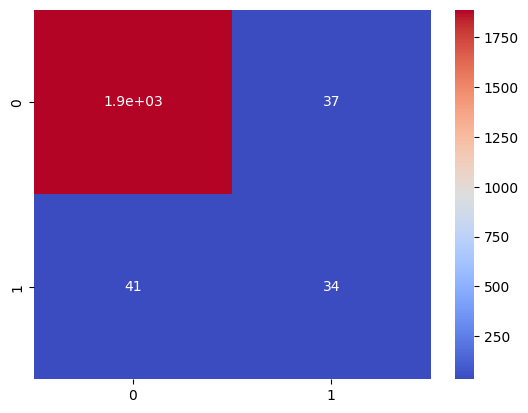

In [214]:
from sklearn.metrics import ConfusionMatrixDisplay
import matplotlib.pyplot as plt

y_true = y_test
mod = metrics.confusion_matrix(y_true,y_pred)
sns.heatmap(mod,annot=True,cmap='coolwarm')

# ROC Curve for Decision Tree

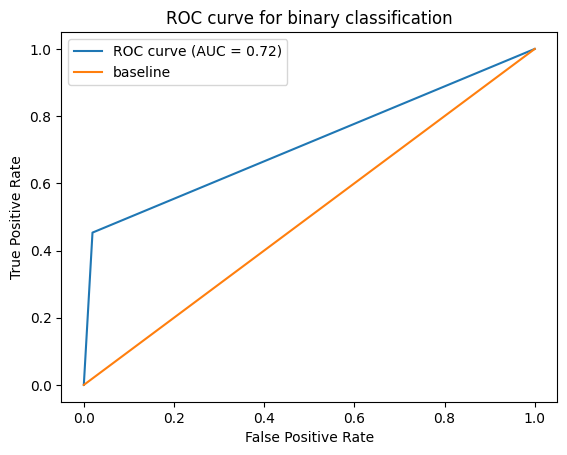

In [215]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, auc


# Predict the probabilities of the positive class
y_pred = model.predict_proba(x_test)[:,1]
y_pred.shape

# Calculate the ROC curve
fpr, tpr, thresholds = roc_curve(y_test, y_pred)

# Calculate the AUC score
auc_score = auc(fpr, tpr)
x1=np.linspace(0,1,100)
# Plot the ROC curve
plt.plot(fpr, tpr, label="ROC curve (AUC = %0.2f)" % auc_score)
plt.plot(x1,x1,label='baseline')
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC curve for binary classification")
plt.legend()
plt.show()

# Random Forest Classifier

In [216]:
from sklearn.model_selection import train_test_split

from sklearn.ensemble import RandomForestClassifier

model = RandomForestClassifier(random_state = 0)

model.fit(x_train,y_train)

y_pred = model.predict(x_test)

# Evaluating the RFC model

In [217]:
print("Accuracy score:%.3f"%accuracy_score(y_test, y_pred))
print('Precision: %.3f' % precision_score(y_test, y_pred, average = 'macro'))
print('Recall: %.3f' % recall_score(y_test, y_pred, average = 'macro'))
print('F1 score: %.3f'%f1_score(y_test,y_pred, average = 'macro'))

Accuracy score:0.973
Precision: 0.897
Recall: 0.678
F1 score: 0.743


<Axes: >

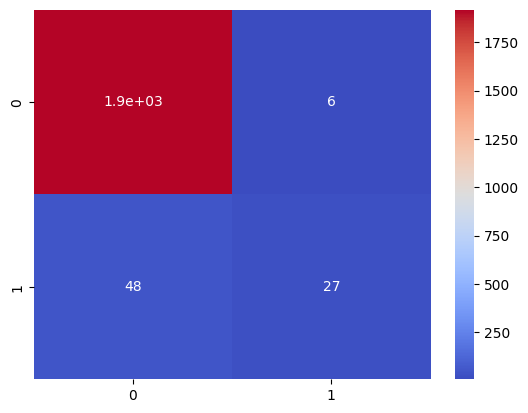

In [218]:
from sklearn.metrics import ConfusionMatrixDisplay
import matplotlib.pyplot as plt

y_true = y_test
mod = metrics.confusion_matrix(y_true,y_pred)
sns.heatmap(mod,annot=True,cmap='coolwarm')

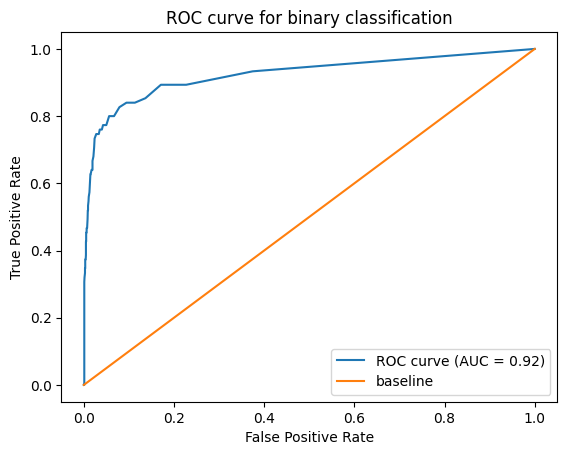

In [219]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, auc


# Predict the probabilities of the positive class
y_pred = model.predict_proba(x_test)[:,1]
y_pred.shape

# Calculate the ROC curve
fpr, tpr, thresholds = roc_curve(y_test, y_pred)

# Calculate the AUC score
auc_score = auc(fpr, tpr)
x1=np.linspace(0,1,100)
# Plot the ROC curve
plt.plot(fpr, tpr, label="ROC curve (AUC = %0.2f)" % auc_score)
plt.plot(x1,x1,label='baseline')
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC curve for binary classification")
plt.legend()
plt.show()

# Optimizing Random Forest with 20 Trees

In [220]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import precision_recall_fscore_support
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import accuracy_score
# instantiate the classifier with n_estimators = 100

model_100 = RandomForestClassifier(n_estimators=20, n_jobs=3,random_state=0)



# fit the model to the training set

model_100.fit(x_train, y_train)



# Predict on the test set results

y_pred = model_100.predict(x_test)



# Check accuracy score 

print("Accuracy score:%.3f"%accuracy_score(y_test, y_pred))
print('Precision: %.3f' % precision_score(y_test, y_pred, average = 'macro'))
print('Recall: %.3f' % recall_score(y_test, y_pred, average = 'macro'))
print('F1 score: %.3f'%f1_score(y_test,y_pred, average = 'macro'))

Accuracy score:0.975
Precision: 0.915
Recall: 0.692
F1 score: 0.760


<Axes: >

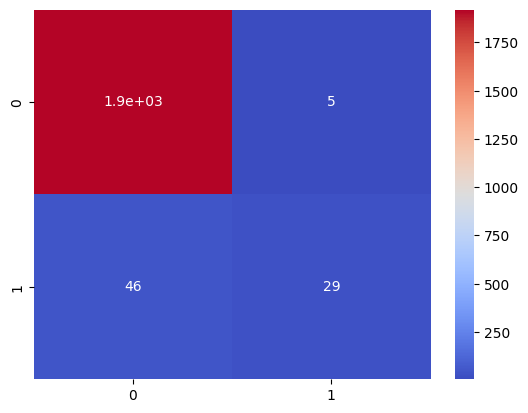

In [221]:
from sklearn.metrics import ConfusionMatrixDisplay
import matplotlib.pyplot as plt

y_true = y_test
mod = metrics.confusion_matrix(y_true,y_pred)
sns.heatmap(mod,annot=True,cmap='coolwarm')

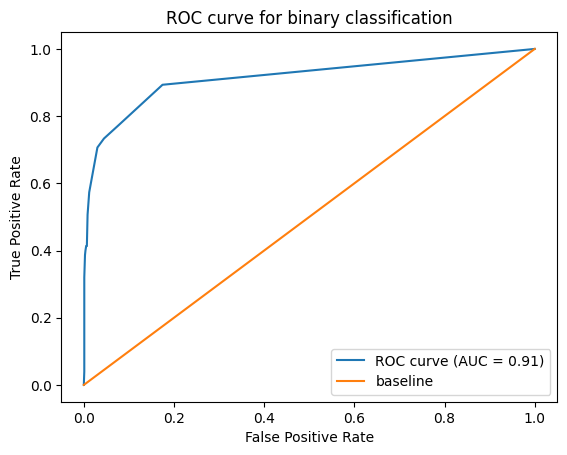

In [222]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, auc


# Predict the probabilities of the positive class
y_pred = model_100.predict_proba(x_test)[:,1]
y_pred.shape

# Calculate the ROC curve
fpr, tpr, thresholds = roc_curve(y_test, y_pred)

# Calculate the AUC score
auc_score = auc(fpr, tpr)
x1=np.linspace(0,1,100)
# Plot the ROC curve
plt.plot(fpr, tpr, label="ROC curve (AUC = %0.2f)" % auc_score)
plt.plot(x1,x1,label='baseline')
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC curve for binary classification")
plt.legend()
plt.show()

# Logistic Regression

In [223]:
from sklearn.linear_model import LogisticRegression
model = LogisticRegression(random_state = 16)
model.fit(x_train,y_train)
y_pred = model.predict(x_test)

# Evaluation for Logistic Regression

In [224]:
print("Accuracy score:%.3f"%accuracy_score(y_test, y_pred))
print('Precision: %.3f' % precision_score(y_test, y_pred, average = 'macro'))
print('Recall: %.3f' % recall_score(y_test, y_pred, average = 'macro'))
print('F1 score: %.3f'%f1_score(y_test,y_pred, average = 'macro'))

Accuracy score:0.962
Precision: 0.481
Recall: 0.500
F1 score: 0.490


# Evaluation using Confusion Matrix

<Axes: >

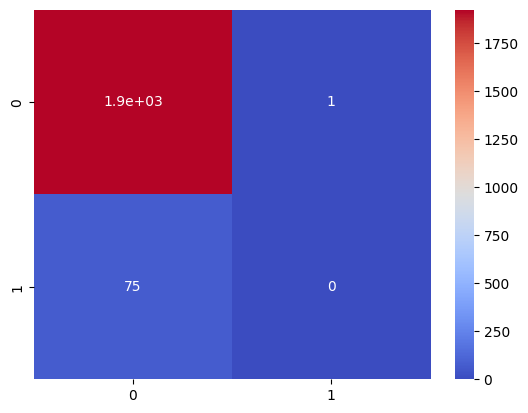

In [225]:
from sklearn.metrics import ConfusionMatrixDisplay
import matplotlib.pyplot as plt

y_true = y_test
mod = metrics.confusion_matrix(y_true,y_pred)
sns.heatmap(mod,annot=True,cmap='coolwarm')

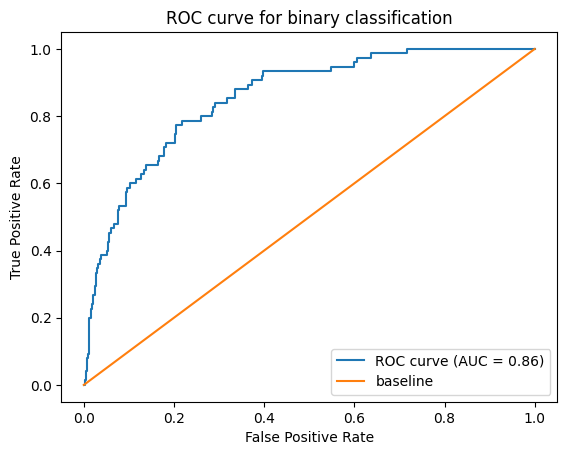

In [226]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, auc


# Predict the probabilities of the positive class
y_pred = model.predict_proba(x_test)[:,1]
y_pred.shape

# Calculate the ROC curve
fpr, tpr, thresholds = roc_curve(y_test, y_pred)

# Calculate the AUC score
auc_score = auc(fpr, tpr)
x1=np.linspace(0,1,100)
# Plot the ROC curve
plt.plot(fpr, tpr, label="ROC curve (AUC = %0.2f)" % auc_score)
plt.plot(x1,x1,label='baseline')
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC curve for binary classification")
plt.legend()
plt.show()

# SVM classification

In [227]:
from sklearn import svm

model = svm.SVC(kernel = 'linear') #creating SVM classifier

model.fit(x_train,y_train) #training the SVC model

y_pred = model.predict(x_test) #predicting the SVM outcome

# Evaluating the model

In [228]:
from sklearn.metrics import accuracy_score

print("Accuracy score:%.3f"%accuracy_score(y_test, y_pred))
print('Precision: %.3f' % precision_score(y_test, y_pred, average = 'macro'))
print('Recall: %.3f' % recall_score(y_test, y_pred, average = 'macro'))
print('F1 score: %.3f'%f1_score(y_test,y_pred, average = 'macro'))

Accuracy score:0.963
Precision: 0.481
Recall: 0.500
F1 score: 0.490


/opt/conda/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


<Axes: >

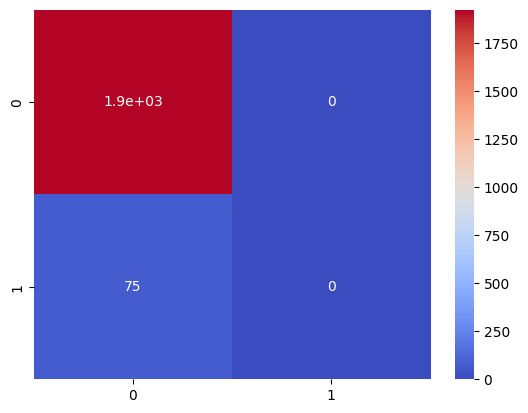

In [229]:
from sklearn.metrics import ConfusionMatrixDisplay
import matplotlib.pyplot as plt

y_true = y_test
mod = metrics.confusion_matrix(y_true,y_pred)
sns.heatmap(mod,annot=True,cmap='coolwarm')

# Using Kernel RBF

In [230]:
modelpoly = svm.SVC(kernel = 'rbf', probability = True) #using kernel poly

modelpoly.fit(x_train,y_train) #training the model

y_pred = modelpoly.predict(x_test) #predicting the output

In [231]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score

print("Accuracy score:%.3f"%accuracy_score(y_test, y_pred))
print('Precision: %.3f' % precision_score(y_test, y_pred, average = 'macro'))
print('Recall: %.3f' % recall_score(y_test, y_pred, average = 'macro'))
print('F1 score: %.3f'%f1_score(y_test,y_pred, average = 'macro'))

Accuracy score:0.963
Precision: 0.481
Recall: 0.500
F1 score: 0.490


/opt/conda/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


<Axes: >

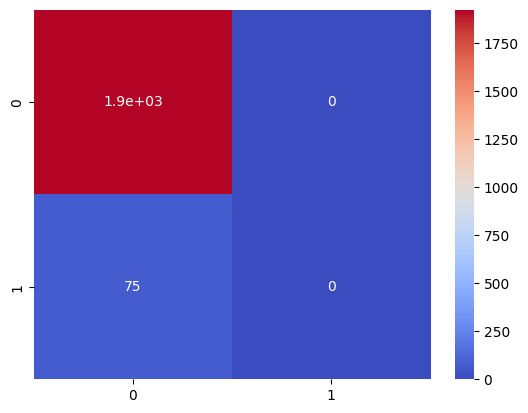

In [232]:
from sklearn.metrics import ConfusionMatrixDisplay
import matplotlib.pyplot as plt

y_true = y_test
mod = metrics.confusion_matrix(y_true,y_pred)
sns.heatmap(mod,annot=True,cmap='coolwarm')

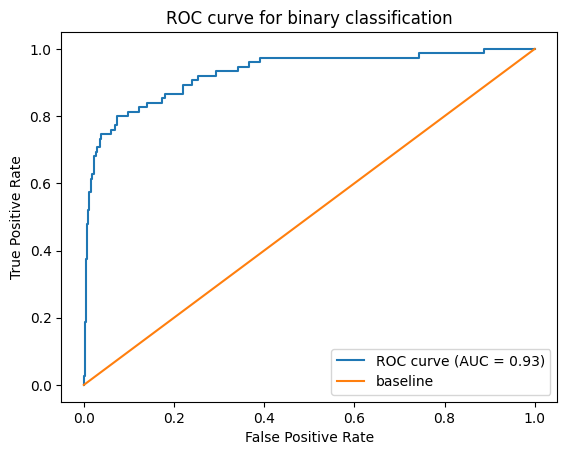

In [233]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, auc


# Predict the probabilities of the positive class
y_pred = modelpoly.predict_proba(x_test)[:,1]
y_pred.shape

# Calculate the ROC curve
fpr, tpr, thresholds = roc_curve(y_test, y_pred)

# Calculate the AUC score
auc_score = auc(fpr, tpr)
x1=np.linspace(0,1,100)
# Plot the ROC curve
plt.plot(fpr, tpr, label="ROC curve (AUC = %0.2f)" % auc_score)
plt.plot(x1,x1,label='baseline')
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC curve for binary classification")
plt.legend()
plt.show()

# Gradient Boosting

In [234]:
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.datasets import load_digits


In [235]:
SEED = 23
y=data["Machine failure"]
x=data.drop(["Machine failure"],axis =1)
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size = 0.25, random_state = SEED)

In [236]:
model = GradientBoostingClassifier(n_estimators=300,learning_rate=0.05,random_state=100,max_features = 5)
model.fit(x_train, y_train)
y_pred=model.predict(x_test)

In [237]:
print("Accuracy score:%.3f"%accuracy_score(y_test, y_pred))
print('Precision: %.3f' % precision_score(y_test, y_pred, average = 'macro'))
print('Recall: %.3f' % recall_score(y_test, y_pred, average = 'macro'))
print('F1 score: %.3f'%f1_score(y_test,y_pred, average = 'macro'))

Accuracy score:0.979
Precision: 0.944
Recall: 0.778
F1 score: 0.840


<Axes: >

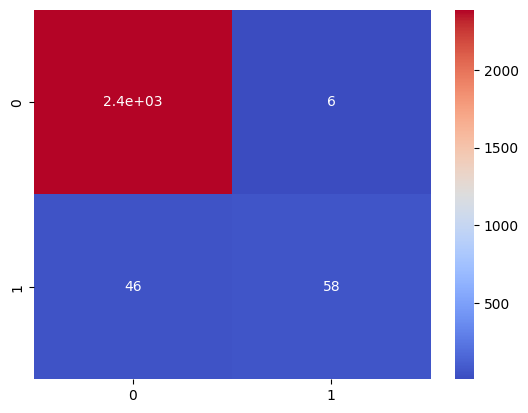

In [238]:
from sklearn.metrics import ConfusionMatrixDisplay
import matplotlib.pyplot as plt

y_true = y_test
mod = metrics.confusion_matrix(y_true,y_pred)
sns.heatmap(mod,annot=True,cmap='coolwarm')

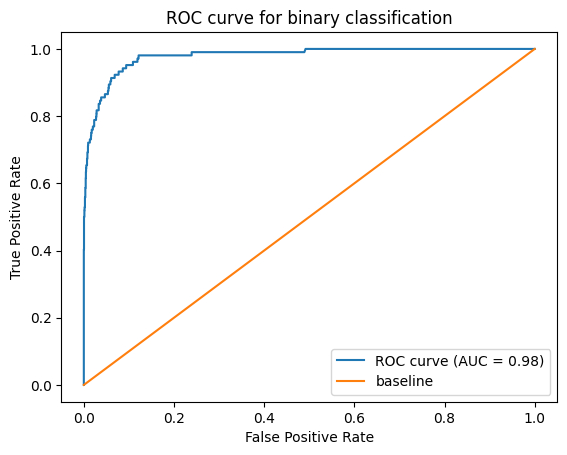

In [239]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, auc


# Predict the probabilities of the positive class
y_pred = model.predict_proba(x_test)[:,1]
y_pred.shape

# Calculate the ROC curve
fpr, tpr, thresholds = roc_curve(y_test, y_pred)

# Calculate the AUC score
auc_score = auc(fpr, tpr)
x1=np.linspace(0,1,100)
# Plot the ROC curve
plt.plot(fpr, tpr, label="ROC curve (AUC = %0.2f)" % auc_score)
plt.plot(x1,x1,label='baseline')
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC curve for binary classification")
plt.legend()
plt.show()

In [240]:
data.columns

Index(['Type', 'Air temperature', 'Process temperature', 'Rotational speed',
       'Torque', 'Tool wear', 'Machine failure'],
      dtype='object')

# ADA BOOSTING

In [241]:
from sklearn.ensemble import AdaBoostClassifier
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score


In [242]:
x_train, x_test, y_train, y_test=train_test_split(x,y,test_size=0.2,random_state=0)

model=AdaBoostClassifier(n_estimators = 50, learning_rate=1)

model.fit(x_train, y_train)

y_pred = model.predict(x_test)


In [243]:
print("Accuracy score:%.3f"%accuracy_score(y_test, y_pred))
print('Precision: %.3f' % precision_score(y_test, y_pred, average = 'macro'))
print('Recall: %.3f' % recall_score(y_test, y_pred, average = 'macro'))
print('F1 score: %.3f'%f1_score(y_test,y_pred, average = 'macro'))

Accuracy score:0.966
Precision: 0.773
Recall: 0.688
F1 score: 0.721


<Axes: >

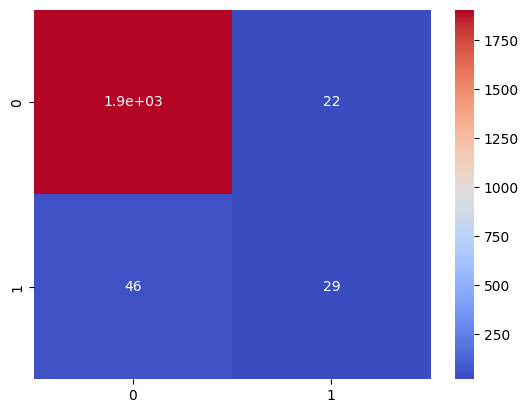

In [244]:
from sklearn.metrics import ConfusionMatrixDisplay
import matplotlib.pyplot as plt

y_true = y_test
mod = metrics.confusion_matrix(y_true,y_pred)
sns.heatmap(mod,annot=True,cmap='coolwarm')

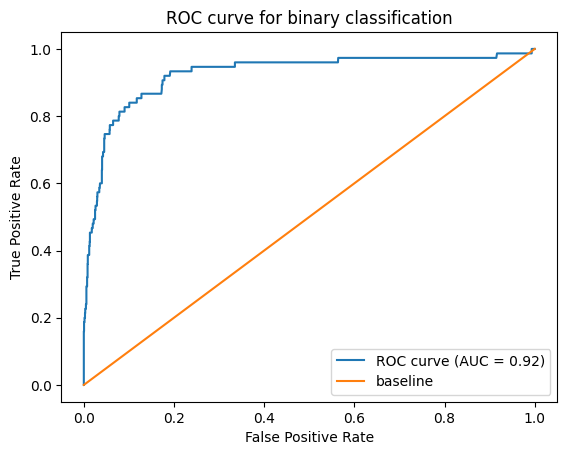

In [245]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, auc


# Predict the probabilities of the positive class
y_pred = model.predict_proba(x_test)[:,1]
y_pred.shape

# Calculate the ROC curve
fpr, tpr, thresholds = roc_curve(y_test, y_pred)

# Calculate the AUC score
auc_score = auc(fpr, tpr)
x1=np.linspace(0,1,100)
# Plot the ROC curve
plt.plot(fpr, tpr, label="ROC curve (AUC = %0.2f)" % auc_score)
plt.plot(x1,x1,label='baseline')
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC curve for binary classification")
plt.legend()
plt.show()

# Optimizing ADA Boost by modifying estimators and learning rate

In [246]:
x_train, x_test, y_train, y_test=train_test_split(x,y,test_size=0.2,random_state=0)

model=AdaBoostClassifier(n_estimators = 100, learning_rate=0.50)

model.fit(x_train, y_train)

y_pred = model.predict(x_test)

In [247]:
print("Accuracy score:%.3f"%accuracy_score(y_test, y_pred))
print('Precision: %.3f' % precision_score(y_test, y_pred, average = 'macro'))
print('Recall: %.3f' % recall_score(y_test, y_pred, average = 'macro'))
print('F1 score: %.3f'%f1_score(y_test,y_pred, average = 'macro'))

Accuracy score:0.969
Precision: 0.799
Recall: 0.702
F1 score: 0.740


<Axes: >

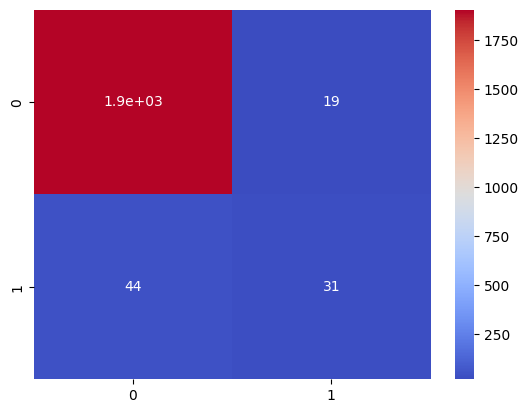

In [248]:
from sklearn.metrics import ConfusionMatrixDisplay
import matplotlib.pyplot as plt

y_true = y_test
mod = metrics.confusion_matrix(y_true,y_pred)
sns.heatmap(mod,annot=True,cmap='coolwarm')

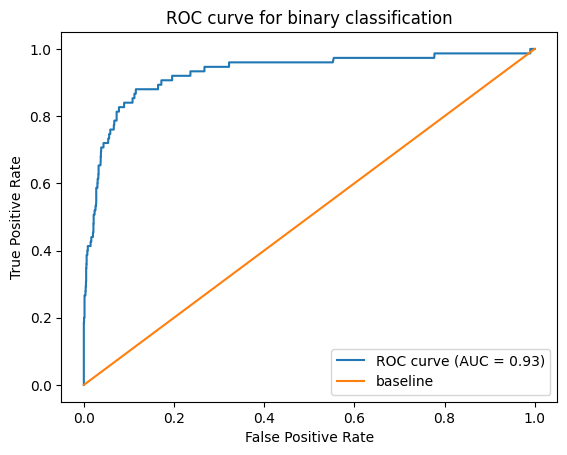

In [249]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, auc


# Predict the probabilities of the positive class
y_pred = model.predict_proba(x_test)[:,1]
y_pred.shape

# Calculate the ROC curve
fpr, tpr, thresholds = roc_curve(y_test, y_pred)

# Calculate the AUC score
auc_score = auc(fpr, tpr)
x1=np.linspace(0,1,100)
# Plot the ROC curve
plt.plot(fpr, tpr, label="ROC curve (AUC = %0.2f)" % auc_score)
plt.plot(x1,x1,label='baseline')
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC curve for binary classification")
plt.legend()
plt.show()

# Result Analysis using AutoLogger

In [250]:
!pip install AutoLogging_ML

In [ ]:
from AutoLogging_ML import AutoLogger
b,model1 = AutoLogger.train_and_log_classification(x_train, y_train, x_test, y_test)

In [252]:
b

,model,training-accuracy,training-precision,training-recall,training-f1,training-confusion matrix,validation-accuracy,validation-precision,validation-recall,validation-f1,validation-confusion matrix,training-classification report,validation-classification report
4,naive bayes,95.9375,64.635506,59.483995,61.427257,"[[7621, 115], [210, 54]]",96.05,70.532883,59.506494,62.746305,"[[1906, 19], [60, 15]]",precision recall f1-score ...,precision recall f1-score ...
14,quadratic discriminant analysis,96.3250,70.145810,65.538137,67.508624,"[[7620, 116], [178, 86]]",96.15,72.405029,62.761905,66.102516,"[[1903, 22], [55, 20]]",precision recall f1-score ...,precision recall f1-score ...
2,svm-poly,96.7000,48.350000,50.000000,49.161159,"[[7736, 0], [264, 0]]",96.25,48.125000,50.000000,49.044586,"[[1925, 0], [75, 0]]",precision recall f1-score ...,precision recall f1-score ...
1,svm-rbf,96.7500,98.374187,50.757576,50.666196,"[[7736, 0], [260, 4]]",96.30,98.149075,50.666667,50.372874,"[[1925, 0], [74, 1]]",precision recall f1-score ...,precision recall f1-score ...
10,logistic regression,97.1375,85.661715,60.104470,65.292717,"[[7717, 19], [210, 54]]",96.40,77.332023,57.125541,60.780469,"[[1917, 8], [64, 11]]",precision recall f1-score ...,precision recall f1-score ...
3,knn,97.5750,90.706102,66.367397,73.020782,"[[7719, 17], [177, 87]]",96.45,77.326397,59.714286,63.940995,"[[1914, 11], [60, 15]]",precision recall f1-score ...,precision recall f1-score ...
13,linear discriminant analysis,97.0750,78.557928,67.755241,71.783959,"[[7670, 66], [168, 96]]",96.45,76.255432,63.558442,67.670770,"[[1908, 17], [54, 21]]",precision recall f1-score ...,precision recall f1-score ...
0,svm-linear,97.1750,94.256650,57.928692,62.828183,"[[7732, 4], [222, 42]]",96.50,81.696054,56.536797,60.215970,"[[1920, 5], [65, 10]]",precision recall f1-score ...,precision recall f1-score ...
7,adaboost,97.6250,84.511131,73.527545,77.896169,"[[7684, 52], [138, 126]]",96.60,77.251280,68.761905,72.138227,"[[1903, 22], [46, 29]]",precision recall f1-score ...,precision recall f1-score ...
5,decision tree,100.0000,100.000000,100.000000,100.000000,"[[7736, 0], [0, 264]]",97.35,81.400918,82.606061,81.990890,"[[1897, 28], [25, 50]]",precision recall f1-score ...,precision recall f1-score ...


In [253]:
model1

<Axes: xlabel='validation-accuracy', ylabel='model'>

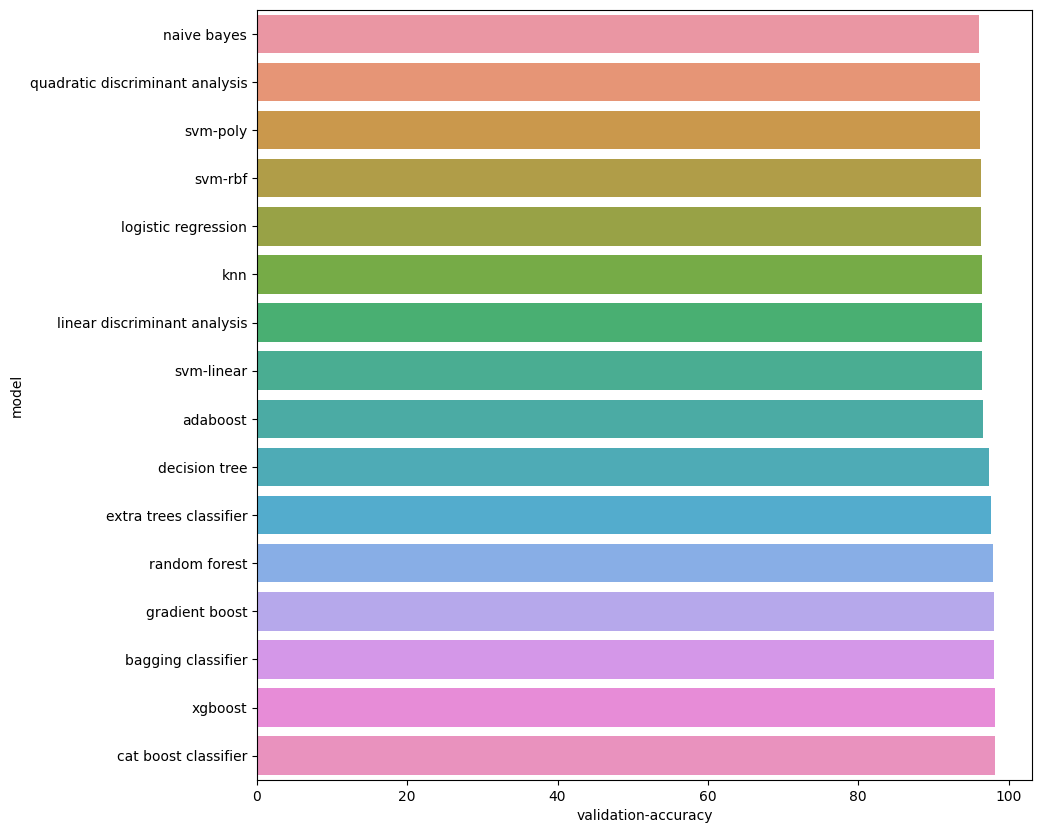

In [254]:
AutoLogger.get_metric_plot_classification(b,'validation','accuracy')

In [255]:
AutoLogger.get_classification_report(b,'validation')

naive bayes
              precision    recall  f1-score   support

           0       0.97      0.99      0.98      1925
           1       0.44      0.20      0.28        75

    accuracy                           0.96      2000
   macro avg       0.71      0.60      0.63      2000
weighted avg       0.95      0.96      0.95      2000

quadratic discriminant analysis
              precision    recall  f1-score   support

           0       0.97      0.99      0.98      1925
           1       0.48      0.27      0.34        75

    accuracy                           0.96      2000
   macro avg       0.72      0.63      0.66      2000
weighted avg       0.95      0.96      0.96      2000

svm-poly
              precision    recall  f1-score   support

           0       0.96      1.00      0.98      1925
           1       0.00      0.00      0.00        75

    accuracy                           0.96      2000
   macro avg       0.48      0.50      0.49      2000
weighted avg       0.

# Test Run (Using GradientBoost)

In [256]:
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import GradientBoostingClassifier

#Load the trained Gradient Boosting model
model = GradientBoostingClassifier(n_estimators=300,learning_rate=0.05,random_state=100,max_features = 5)
model.fit(x_train,y_train)
#Create a StandardScaler object
scaler = StandardScaler()
#Get the live values of the input features
ty=int(input('enter the type'))
air_temperature = float(input("Air temperature [K]: "))
process_temperature = float(input("Process temperature [K]: "))
rotational_speed = float(input("Rotational speed [rpm]: "))
torque = float(input("Torque [Nm]: "))
tool_wear = float(input("Tool wear [min]: "))
#Scale the live values using the fitted StandardScaler object
test=pd.DataFrame([[ty,air_temperature, process_temperature, rotational_speed, torque, tool_wear]],columns=['type','Air temperature', 'Process temperature', 'Rotational speed',
       'Torque', 'Tool wear'])
scaled_live_values = scaler.fit_transform(test)
#Make a prediction using the scaled live values
prediction = model.predict(scaled_live_values)
if prediction==0:
    print('failure')
else:
    print('normal')

enter the type 1
Air temperature [K]:  290
Process temperature [K]:  300
Rotational speed [rpm]:  1598
Torque [Nm]:  29.98
Tool wear [min]:  14


normal


/opt/conda/lib/python3.10/site-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but GradientBoostingClassifier was fitted with feature names
  warnings.warn(
